In [1]:
from scipy.stats import multivariate_normal
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

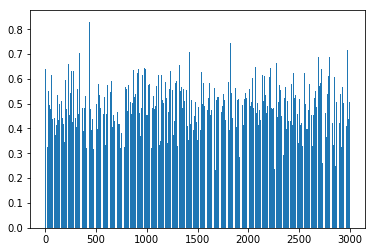

In [2]:
# Generate non-uniform distribution
mu = 0.5
cov = 0.1
M = 3000   # no. of samples
N = 200    # sample size (size of each bin)
distribution = np.random.normal(loc=mu, scale=cov, size=M)
plt.bar([i for i in range(M)], distribution)
plt.show()

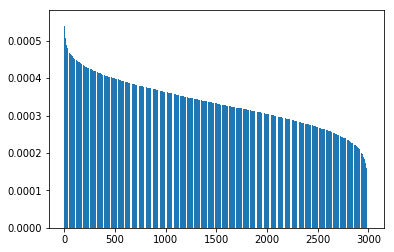

In [3]:
# Sort the distribution in reverse order of probabilities
distribution = distribution / sum(distribution)     # Normalize the distribution (sum of probabilities add to 1)
sorted_distribution_indices = np.argsort(distribution)[::-1]
sorted_distribution = np.sort(distribution)[::-1]   # Sort distribution in reverse order
plt.bar([i for i in range(M)], sorted_distribution)
plt.show()

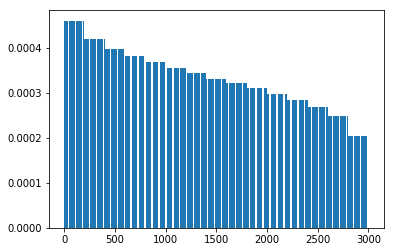

In [4]:
# Divide the data into bins
bins = {}
bins_indices = {}
for i in range(0, M, N):
    bins[int(i/N)] = sorted_distribution[i:i+N]
    bins_indices[int(i/N)] = sorted_distribution_indices[i:i+N]

# Calculate the mean probability of each bin
bins_prob = {}
for key, value in bins.items():
    bins_prob[key] = sum(value) / len(value)

# Plot its distribution
bins_distribution = np.zeros((M))
k = 0
for i in range(len(bins_prob)):
    for j in range(N):
        bins_distribution[k] = bins_prob[i]
        k+=1
        
plt.bar([i for i in range(M)], bins_distribution)        
plt.show()

In [5]:
# Get the probability distribution of the mean probabilities for every bin (by normalizing)
p = []
for prob in list(bins_prob.values()):
    p.append(prob/sum(bins_prob.values()))
    
# Select bins randomly with replacement
selected_bins = []
for i in range(N):
    selected_bins.append(np.random.choice(list(bins_prob.keys()), p=p, replace=True))
selected_bins = Counter(selected_bins)
print(selected_bins)

Counter({0: 25, 5: 18, 1: 18, 9: 17, 8: 15, 4: 13, 6: 13, 3: 13, 11: 13, 10: 12, 7: 10, 13: 10, 2: 10, 12: 7, 14: 6})


In [6]:
# Select indices from every bin corresponding to selected_bins
selected_indices = []
for key, value in selected_bins.items():
    selected_indices.append(np.random.choice(list(bins_indices[key]), size=value, replace=False))
selected_indices = [item for sublist in selected_indices for item in sublist]
print(selected_indices)

[2658, 685, 1801, 64, 209, 2629, 2337, 1854, 1709, 2986, 245, 936, 233, 2943, 177, 59, 296, 924, 2055, 446, 1492, 2074, 2998, 1646, 2588, 1935, 1952, 1867, 1960, 1817, 2713, 2637, 2739, 1221, 2119, 600, 2156, 182, 2072, 339, 534, 1326, 2911, 1772, 2227, 165, 2013, 1064, 311, 1253, 2836, 1114, 2667, 2301, 925, 2213, 2655, 236, 2936, 65, 351, 2622, 100, 1830, 1281, 2610, 2557, 1787, 584, 2146, 1905, 1626, 2842, 2814, 1858, 33, 1818, 832, 357, 2035, 1572, 2668, 560, 1365, 2245, 2158, 2111, 1972, 275, 166, 1767, 77, 1617, 662, 2671, 1153, 2016, 358, 61, 707, 1750, 1896, 2010, 2902, 278, 2071, 1457, 2118, 897, 336, 2528, 1554, 1847, 2834, 795, 1506, 2688, 2217, 2664, 1797, 2356, 2538, 1265, 626, 1983, 1441, 1118, 2653, 2853, 1454, 1878, 2456, 1994, 2703, 34, 1155, 1979, 903, 1521, 2176, 1012, 1211, 2323, 2675, 1322, 909, 2205, 1346, 2365, 1011, 99, 2117, 764, 2030, 23, 2993, 2496, 29, 112, 194, 2587, 1323, 465, 997, 142, 1745, 1799, 2288, 1007, 516, 2448, 1106, 2412, 2962, 2518, 946, 2406, 

In [7]:
selected_indices_prob = []
selected_indices_bin_prob = []
for i in range(M):
    if sorted_distribution_indices[i] in selected_indices:
        selected_indices_prob.append(sorted_distribution[i])
    else:
        selected_indices_prob.append(0.0)
    if sorted_distribution_indices[i] in selected_indices:
        for key, value in bins_indices.items():
            if sorted_distribution_indices[i] in value.tolist():
                selected_indices_bin_prob.append(bins_prob[key])
    else:
        selected_indices_bin_prob.append(0.0)

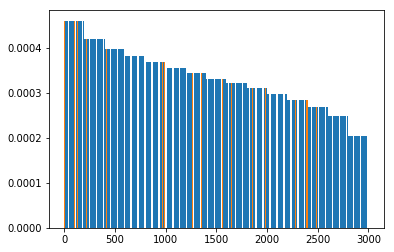

In [8]:
plt.bar([i for i in range(M)], bins_distribution)
plt.bar([i for i in range(M)], selected_indices_bin_prob)
plt.show()

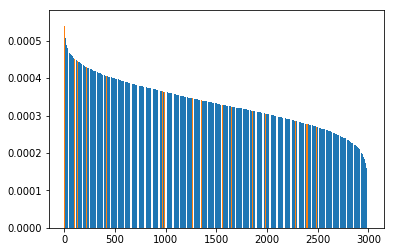

In [9]:
plt.bar([i for i in range(M)], sorted_distribution)
plt.bar([i for i in range(M)], selected_indices_prob)
plt.show()

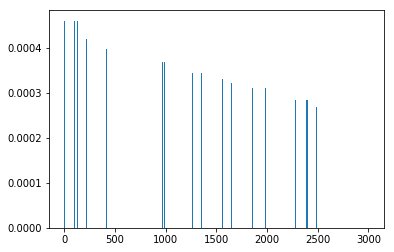

In [10]:
plt.bar([i for i in range(M)], selected_indices_bin_prob)
plt.show()

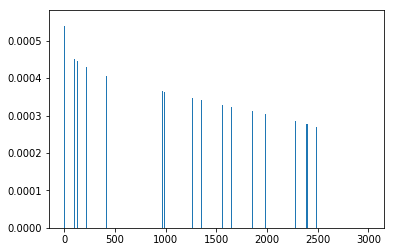

In [11]:
plt.bar([i for i in range(M)], selected_indices_prob)
plt.show()